shape of input data: (300, 2)


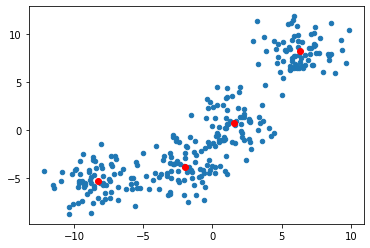

In [6]:
#Tạo 300 điểm dữ liệu với 4 phân cụm, dùng thư viện sklearn để tìm điểm centroid của 4 phân cụng đó và vẽ lên trục toạ độ.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
points, true_labels = make_blobs(n_samples=300,n_features=2,centers=4,cluster_std=1.5,random_state=57)
print('shape of input data:', points.shape)
plt.scatter(points[:,0],points[:,1], 20)
kmeans = KMeans(n_clusters=4, random_state=0).fit(points)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'r')
plt.show()

Clusters 1: 
[[-0.12544623 -3.32186069]
 [-5.213135   -3.16209332]
 [ 6.42086189  8.07953776]
 [ 2.56656116  0.90047673]]


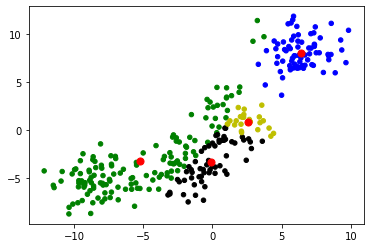

Clusters 2: 
[[-9.72908855 -4.24051413]
 [ 6.20227043  7.81053564]
 [ 1.68854059 -3.14419636]
 [-2.79744851 -2.75583823]]


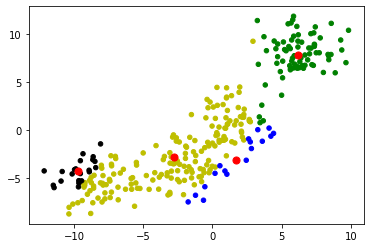

Clusters 3: 
[[-3.28634021 -4.19143906]
 [ 2.34386699 -1.30825655]
 [ 5.15005482  6.03340706]
 [-6.47406257 -2.08804752]]


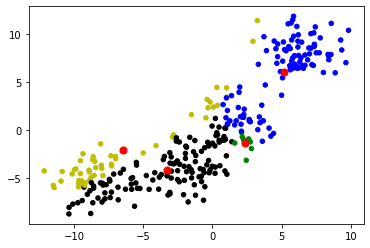

Clusters 4: 
[[-0.59627741  1.38491462]
 [ 5.13404507  6.84269602]
 [-2.05301152 -2.95010763]
 [-9.09507437 -6.08084544]]


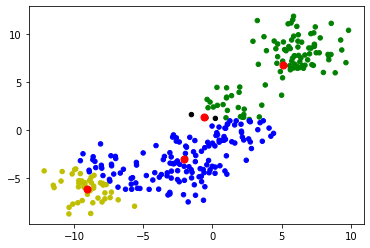

Clusters 5: 
[[-4.63476286 -4.1914639 ]
 [ 2.77268801 -0.69387198]
 [-7.          6.        ]
 [ 4.74681563  6.35204183]]


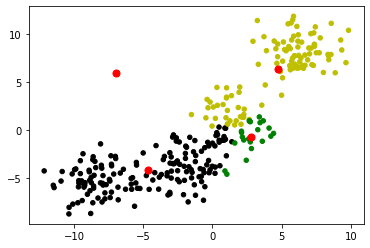

Best result: clusters  1
[[-0.12544623 -3.32186069]
 [-5.213135   -3.16209332]
 [ 6.42086189  8.07953776]
 [ 2.56656116  0.90047673]]


In [10]:
import math
from random import randint
K = 4
color_dict = {0:'black', 1:'g', 2:'b', 3:'y'}
set_error = []
set_labels=[]
set_clusters=[]
# Tính khoảng cách 2 điểm
def distance(p1,p2):
	return math.sqrt(pow((p1[0] - p2[0]),2) + pow((p1[1] - p2[1]),2))
#Random K clusters 
def rand_clusters(K = 3):
  for i in range(K):
    clusters.append([randint(-10,10),randint(-10,10)])
# Tìm cluster gần nhất của mỗi điểm
def n_cluster(p):
  distances_cluster = []
  for c in clusters:
    distances_cluster.append(distance(p,c))
  return distances_cluster.index(min(distances_cluster))
for n in range(5):
  clusters = []
  rand_clusters(4)
  error = 0
  new_error = 0
  distance_means = []
  while True:
    if clusters != []:
      labels =[]
      # Tìm cluster gần nhất của mỗi điểm
      for p in points:
        labels.append(n_cluster(p))
      # Cập nhập clusters
      for i in range(K):
        sum_x = 0
        sum_y = 0
        count = 0
        for j in range(len(points)):
          if labels[j] == i:
            sum_x += points[j][0]
            sum_y += points[j][1]
            count += 1
        if count != 0:  
          clusters[i] = [sum_x/count, sum_y/count]
      new_error = 0 
      dis_cluster = [0,0,0,0]
      if labels != []:
        for i in range(len(points)):
          dis_cluster[labels[i]] += distance(points[i], clusters[labels[i]])
                                            
      for i in range(len(dis_cluster)):
        if labels.count(i) != 0:
          dis_cluster[i] = dis_cluster[i]/labels.count(i)
    if new_error == error:
      break
    else:
      error = new_error
  set_error.append(new_error)  
  set_labels.append(labels)
  colors = [color_dict[i] for i in labels]
  clusters = np.array(clusters)
  set_clusters.append(clusters)
  print("Clusters {0}: \n{1}".format(n+1,clusters))
  plt.scatter(points[:,0],points[:,1], 20,c = colors)
  plt.scatter(clusters[:,0], clusters[:,1], 50, color='r')
  plt.show()
best_error = max(set(set_error),key = set_error.count)
colors = [color_dict[i] for i in set_labels[set_error.index(best_error)]]
print("Best result: clusters ", set_error.index(best_error) + 1)
print(set_clusters[set_error.index(best_error)])


[[ 5.78360661  8.3698019 ]
 [-8.28533456 -5.27284716]
 [ 1.42835513  0.76099594]
 [-1.79070822 -4.07539394]]
diem  [[5, -2]]  gan centroid [[1.42835513 0.76099594]]  nhat


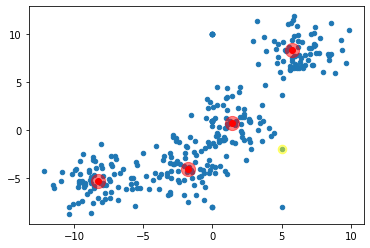

In [75]:
from sklearn.metrics import pairwise_distances_argmin
x = [[5,-2]]
points = np.vstack([points, x])
plt.scatter(points[:,0],points[:,1], 20)
kmeans = KMeans(n_clusters=4, random_state=0).fit(points)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'r')
subList = x[0]
plt.scatter(subList[0], subList[1], c='yellow', s=75, alpha=0.5);
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
print(centers)
labels = pairwise_distances_argmin(x, centers)
print("diem ",x, " gan centroid",centers[labels]," nhat")
